In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv('Online_Retail.csv',encoding='latin1')

The encoding parameter in pd.read_csv allows you to specify the encoding of the file. By setting it to 'latin1' or 'ISO-8859-1', you can handle a wider range of characters and potentially resolve the decoding issue.

In [4]:
data.shape

(541909, 8)

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [7]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


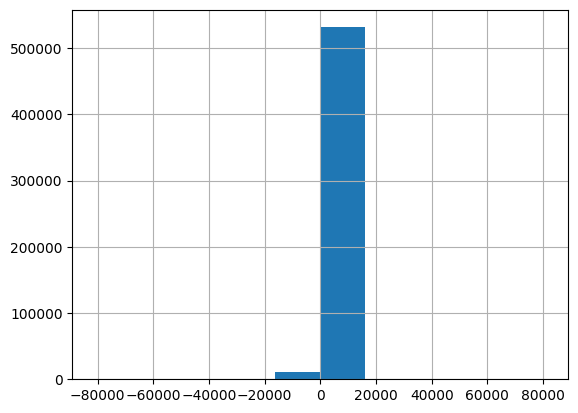

In [10]:
import matplotlib.pyplot as plt
data['Quantity'].hist()
plt.show()


In [11]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [12]:
data.fillna(value={'Description': 'WHITE HANGING HEART T-LIGHT HOLDER'}, inplace=True)

In [13]:
data.fillna(value={'UnitPrice': '2.95'}, inplace=True)

In [14]:
data.fillna(value={'Country': 'United Kingdom'}, inplace=True)

In [15]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [16]:
data = data.drop_duplicates()


In [17]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [18]:
# Example: Remove outliers in a numerical column
from scipy import stats
outlier = data[(np.abs(stats.zscore(data['Quantity'])) < 3)]
outlier.count()

,0
InvoiceNo,536298
StockCode,536298
Description,536298
Quantity,536298
InvoiceDate,536298
UnitPrice,536298
CustomerID,401350
Country,536298


In [34]:

# Data cleaning
data.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing CustomerID
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert InvoiceDate to datetime
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  # Calculate total price per row

# Remove negative quantities (returns)
data = data[data['Quantity'] > 0]


<ipython-input-34-6c5c316158ec>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert InvoiceDate to datetime


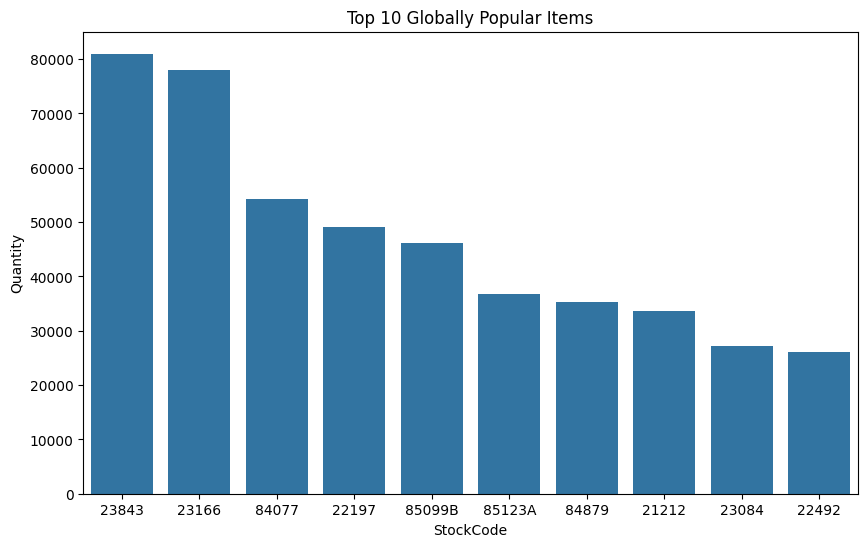

In [36]:
# Calculate total quantity sold per item
popular_items_global = data.groupby('StockCode')['Quantity'].sum().reset_index()
popular_items_global = popular_items_global.sort_values(by='Quantity', ascending=False)

# Plot globally popular items
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Quantity', data=popular_items_global.head(10))
plt.title('Top 10 Globally Popular Items')
plt.show()


In [41]:
popular_items_global.head(10)

,StockCode,Quantity
2399,23843,80995
1997,23166,77916
2804,84077,54319
1088,22197,49160
3219,85099B,46078
3233,85123A,36763
3059,84879,35263
423,21212,33670
1919,23084,27153
1352,22492,26076


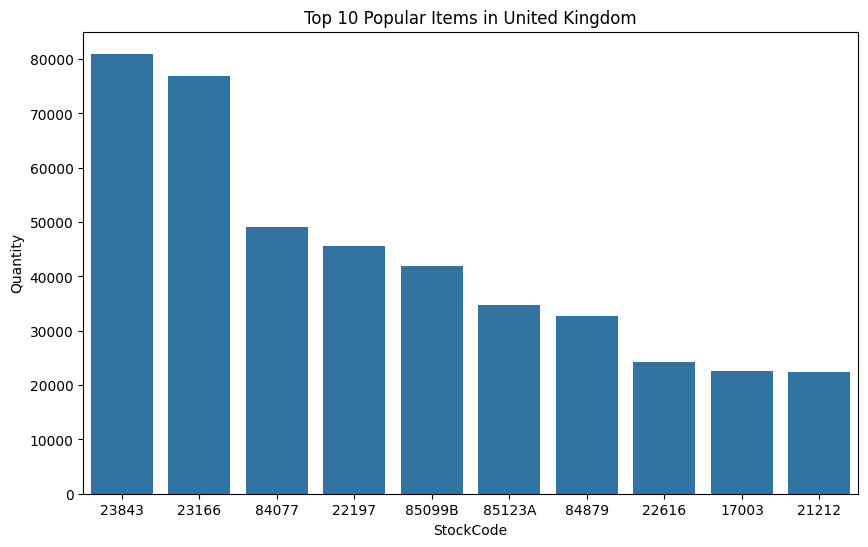

In [38]:
# Calculate total quantity sold per item per country
popular_items_country = data.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index()

# Plot country-wise popular items (for a specific country, e.g., 'United Kingdom')
country = 'United Kingdom'
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Quantity', data=popular_items_country[popular_items_country['Country'] == country].sort_values(by='Quantity', ascending=False).head(10))
plt.title(f'Top 10 Popular Items in {country}')
plt.show()


In [42]:
popular_items_country.head(10)

,Country,StockCode,Quantity
0,Australia,15036,600
1,Australia,15056BL,3
2,Australia,16161P,400
3,Australia,16169E,25
4,Australia,20665,6
5,Australia,20675,216
6,Australia,20676,216
7,Australia,20677,216
8,Australia,20685,50
9,Australia,20711,100


<ipython-input-45-ab25f4e58b4a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-45-ab25f4e58b4a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-45-ab25f4e58b4a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-45-ab25f4e58b4a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-45-ab25f4e58b4a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="rig

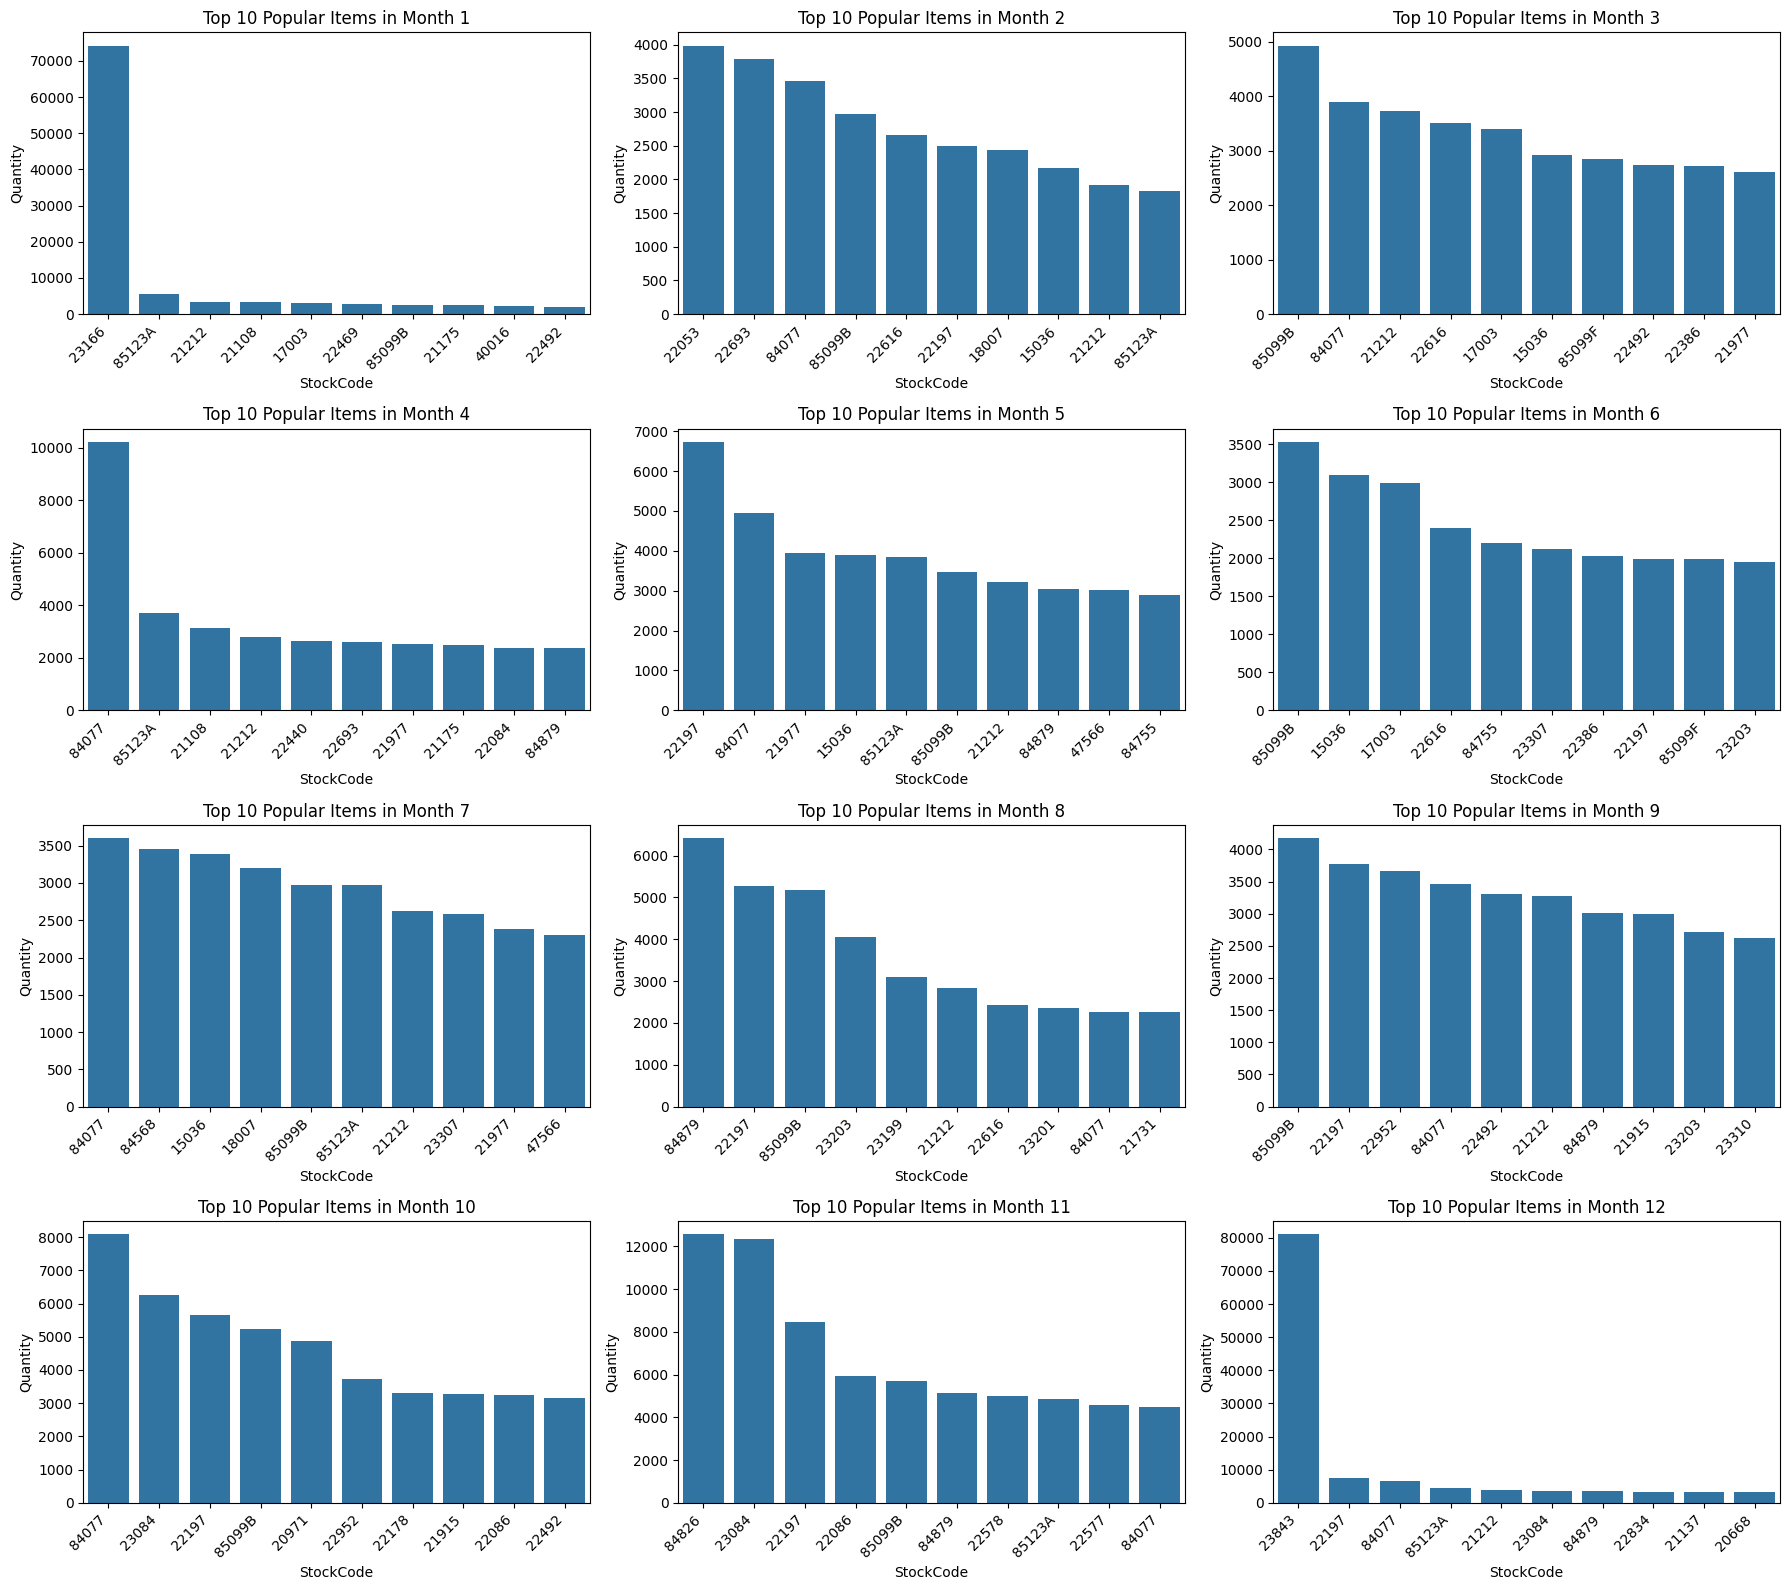

In [45]:
# Set up the figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))  # 4 rows, 3 columns for 12 months

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each month and create a plot
for month in range(1, 13):
    month_data = popular_items_month[popular_items_month['Month'] == month].sort_values(by='Quantity', ascending=False).head(10)

    # Plot on the corresponding subplot
    sns.barplot(x='StockCode', y='Quantity', data=month_data, ax=axes[month-1])
    axes[month-1].set_title(f'Top 10 Popular Items in Month {month}')
    axes[month-1].set_xticklabels(axes[month-1].get_xticklabels(), rotation=45, ha="right")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [47]:
# Global pivot table
global_pivot = pd.pivot_table(data, values='Quantity', index='StockCode', aggfunc=np.sum)

# Country-wise pivot table
country_pivot = pd.pivot_table(data, values='Quantity', index='StockCode', columns='Country', aggfunc=np.sum)

# Month-wise pivot table
month_pivot = pd.pivot_table(data, values='Quantity', index='StockCode', columns='Month', aggfunc=np.sum)


<ipython-input-47-53af19d54a05>:2: FutureWarning: The provided callable <function sum at 0x7cbad0f12e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  global_pivot = pd.pivot_table(data, values='Quantity', index='StockCode', aggfunc=np.sum)
<ipython-input-47-53af19d54a05>:5: FutureWarning: The provided callable <function sum at 0x7cbad0f12e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  country_pivot = pd.pivot_table(data, values='Quantity', index='StockCode', columns='Country', aggfunc=np.sum)
<ipython-input-47-53af19d54a05>:8: FutureWarning: The provided callable <function sum at 0x7cbad0f12e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current be

In [48]:
global_pivot.head(10)

,Quantity
StockCode,
10002,823
10080,291
10120,192
10123C,5
10124A,16
10124G,17
10125,1225
10133,2373
10135,1936


In [49]:
country_pivot.head(10)

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.0,NaN,12.0,NaN,NaN,401.0,NaN
10080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.0,NaN
10120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN
10123C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
10124A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
10124G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN
10125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,615.0,NaN
10133,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2243.0,NaN
10135,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1636.0,NaN


In [50]:
month_pivot.head(10)

Month,1,2,3,4,5,6,7,8,9,10,11,12
StockCode,,,,,,,,,,,,
10002,337.0,50.0,23.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
10080,NaN,2.0,NaN,NaN,NaN,48.0,24.0,60.0,60.0,6.0,91.0,NaN
10120,NaN,30.0,28.0,NaN,3.0,NaN,5.0,35.0,10.0,10.0,49.0,22.0
10123C,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10124A,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
10124G,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0
10125,160.0,NaN,112.0,82.0,107.0,13.0,175.0,85.0,210.0,50.0,62.0,169.0
10133,90.0,37.0,83.0,75.0,33.0,447.0,662.0,630.0,193.0,NaN,NaN,123.0
10135,400.0,263.0,117.0,30.0,8.0,55.0,177.0,151.0,68.0,68.0,165.0,434.0


In [59]:
# Function to recommend items based on similar users
def recommend_items(customer_id, num_recommendations=5):
    customer_data = data[data['CustomerID'] == customer_id]
    customer_bought = customer_data['StockCode'].unique()

    # Calculate similarity
    item_matrix = pd.pivot_table(data, values='Quantity', index='CustomerID', columns='StockCode', aggfunc=np.sum, fill_value=0)
    item_similarity = cosine_similarity(item_matrix)
    sim_df = pd.DataFrame(item_similarity, index=item_matrix.index, columns=item_matrix.index)

    # Check if customer_id is in the index
    if customer_id not in sim_df.index:
        print(f"Customer ID {customer_id} not found.")
        return []  # Return an empty list if customer ID is not found

    # Find similar users
    similar_users = sim_df[customer_id].sort_values(ascending=False).index[1:num_recommendations+1]

    # Recommend items that similar users bought, including descriptions
    recommended_items = []
    for item in data[data['CustomerID'].isin(similar_users)]['StockCode'].value_counts().index:
        if item not in customer_bought:
            item_description = data[data['StockCode'] == item]['Description'].iloc[0]
            recommended_items.append((item, item_description))
            if len(recommended_items) >= num_recommendations:
                break

    return recommended_items



<ipython-input-59-4ec79ac21413>:9: FutureWarning: The provided callable <function sum at 0x7cbad0f12e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  item_matrix = pd.pivot_table(data, values='Quantity', index='CustomerID', columns='StockCode', aggfunc=np.sum, fill_value=0)


Recommended items for customer 12583:
  - Item ID: 22382, Description: LUNCH BAG SPACEBOY DESIGN 
  - Item ID: 22630, Description: DOLLY GIRL LUNCH BOX
  - Item ID: 22662, Description: LUNCH BAG DOLLY GIRL DESIGN
  - Item ID: 84596B, Description: SMALL DOLLY MIX DESIGN ORANGE BOWL
  - Item ID: 22139, Description: RETROSPOT TEA SET CERAMIC 11 PC 


In [63]:


# Example of how to use the recommendation function
customer_id = 12583  # Replace with an actual CustomerID
recommendations = recommend_items(customer_id)
print(f"Recommended items for customer {customer_id}:")
for item, description in recommendations:
    print(f"  - Item ID: {item}, Description: {description}")

<ipython-input-59-4ec79ac21413>:9: FutureWarning: The provided callable <function sum at 0x7cbad0f12e60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  item_matrix = pd.pivot_table(data, values='Quantity', index='CustomerID', columns='StockCode', aggfunc=np.sum, fill_value=0)


Recommended items for customer 12583:
  - Item ID: 22382, Description: LUNCH BAG SPACEBOY DESIGN 
  - Item ID: 22630, Description: DOLLY GIRL LUNCH BOX
  - Item ID: 22662, Description: LUNCH BAG DOLLY GIRL DESIGN
  - Item ID: 84596B, Description: SMALL DOLLY MIX DESIGN ORANGE BOWL
  - Item ID: 22139, Description: RETROSPOT TEA SET CERAMIC 11 PC 


In [65]:
# Function to predict future purchases based on past data
def predict_future_purchases(customer_id, num_predictions=5):
    customer_data = data[data['CustomerID'] == customer_id]
    future_purchases = customer_data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(num_predictions).index
    return future_purchases

# Example of how to use the prediction function
print(f"Predicted future purchases for customer {customer_id}: {predict_future_purchases(customer_id)}")


Predicted future purchases for customer 12583: Index(['22492', '22610', '16218', '22609', '21883'], dtype='object', name='StockCode')
